In [150]:
import pandas as pd
import datetime as dt

movies = pd.read_csv('../Resources/IMDb_movies.csv',low_memory=False)

In [160]:
movies=movies[pd.notnull(movies['description'])]
movies = movies[movies['avg_vote'] > 6.5]
movies=movies.reset_index(drop=True)
movies['id']=movies.index

print(movies.shape)

(27675, 23)


In [161]:
movies.head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,id
0,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,0
1,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,"The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0,1
2,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu",...,The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,NaN,4.0,1.0,2
3,tt0002646,Atlantis,Atlantis,1913,1913-12-26,Drama,121,Denmark,Danish,August Blom,...,After Dr. Friedrich's wife becomes mentally un...,6.6,331,NaN,NaN,NaN,NaN,9.0,9.0,3
4,tt0002844,Fantômas - À l'ombre de la guillotine,Fantômas - À l'ombre de la guillotine,1913,1913-05-12,"Crime, Drama",54,France,French,Louis Feuillade,...,Inspector Juve is tasked to investigate and ca...,7.0,1944,NaN,NaN,NaN,NaN,9.0,28.0,4


<AxesSubplot:>

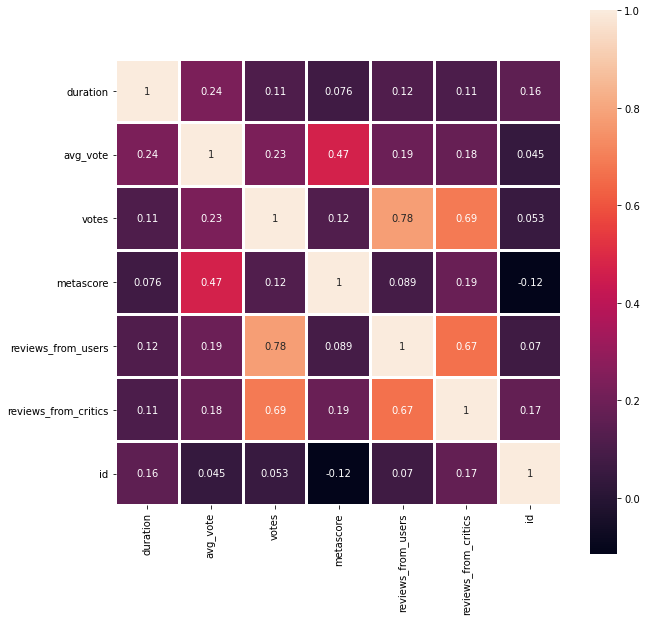

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
corr = movies.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2)

In [162]:
import itertools
import numpy as np

movies['genre'] = movies['genre'].fillna('')
for i in range(movies['genre'].size):
    r=movies['genre'][i].split(",")
    movies['genre'][i] = list(map(str.strip, r))
    

print(movies['genre'][0][0])


movies['writer'] = movies['writer'].fillna('')
for i in range(movies['writer'].size):
    r=movies['writer'][i].split(",")
    movies['writer'][i] = list(map(str.strip, r))
    

print(movies['writer'][0][0])


movies['director'] = movies['director'].fillna('')
for i in range(movies['director'].size):
    r=movies['director'][i].split(",")
    movies['director'][i] = list(map(str.strip, r))
    

print(movies['director'][0][0])

<ipython-input-162-6d1ca68b8a8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genre'][i] = list(map(str.strip, r))


Adventure


<ipython-input-162-6d1ca68b8a8d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['writer'][i] = list(map(str.strip, r))


Dante Alighieri


<ipython-input-162-6d1ca68b8a8d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['director'][i] = list(map(str.strip, r))


Francesco Bertolini


In [163]:
print(movies['genre'])
genre =  np.unique([*itertools.chain.from_iterable(movies['genre'])])
print(genre)

print(movies['writer'])
writer =  np.unique([*itertools.chain.from_iterable(movies['writer'])])
print(writer)

print(movies['director'])
director =  np.unique([*itertools.chain.from_iterable(movies['director'])])
print(director)

0        [Adventure, Drama, Fantasy]
1        [Biography, Drama, Romance]
2                     [History, War]
3                            [Drama]
4                     [Crime, Drama]
                    ...             
27670                        [Drama]
27671                        [Drama]
27672                [Comedy, Drama]
27673                [Comedy, Drama]
27674                        [Drama]
Name: genre, Length: 27675, dtype: object
['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror'
 'Music' 'Musical' 'Mystery' 'Reality-TV' 'Romance' 'Sci-Fi' 'Sport'
 'Thriller' 'War' 'Western']
0                         [Dante Alighieri]
1               [Norbert Falk, Hanns Kräly]
2        [Aristide Demetriade, Petre Liciu]
3           [Axel Garde, Gerhart Hauptmann]
4          [Marcel Allain, Louis Feuillade]
                        ...                
27670                    [Rajesh k Narayan]
27671    

In [164]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(genre)
genre_encoded = movies["genre"].apply(lambda x:label_encoder.transform(x))
movies['encoded_genre'] = genre_encoded

label_encoder.fit(writer)
writer_encoded = movies["writer"].apply(lambda x:label_encoder.transform(x))
movies['writer_encoded'] = writer_encoded


label_encoder.fit(director)
director_encoded = movies["director"].apply(lambda x:label_encoder.transform(x))
movies['director_encoded'] = director_encoded


In [165]:
movies.head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,id,encoded_genre,writer_encoded,director_encoded
0,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"[Adventure, Drama, Fantasy]",68,Italy,Italian,"[Francesco Bertolini, Adolfo Padovan]",...,NaN,NaN,NaN,NaN,31.0,14.0,0,"[1, 7, 9]",[4247],"[3353, 135]"
1,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"[Biography, Drama, Romance]",85,Germany,German,[Ernst Lubitsch],...,NaN,NaN,NaN,NaN,12.0,9.0,1,"[3, 7, 17]","[15653, 7679]",[3131]
2,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"[History, War]",120,Romania,NaN,"[Aristide Demetriade, Grigore Brezeanu]",...,ROL 400000,NaN,NaN,NaN,4.0,1.0,2,"[11, 21]","[1717, 16637]","[987, 3895]"
3,tt0002646,Atlantis,Atlantis,1913,1913-12-26,[Drama],121,Denmark,Danish,[August Blom],...,NaN,NaN,NaN,NaN,9.0,9.0,3,[7],"[2003, 6963]",[1138]
4,tt0002844,Fantômas - À l'ombre de la guillotine,Fantômas - À l'ombre de la guillotine,1913,1913-05-12,"[Crime, Drama]",54,France,French,[Louis Feuillade],...,NaN,NaN,NaN,NaN,9.0,28.0,4,"[5, 7]","[13219, 12629]",[6742]


In [169]:
movies.to_csv("../Resources/modified_movies.csv")

In [211]:
movies_df = pd.read_csv('../Resources/modified_movies.csv',low_memory=False)
movies_df.sort_values(by=['avg_vote'], inplace=True, ascending=False)

In [213]:
sub_movies_df.head(5)

sub_movies_df.shape

movies_df = sub_movies_df

In [188]:
rating = pd.read_csv('../Resources/IMDb_ratings.csv',low_memory=False)

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [214]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies_df['description']=movies_df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies_df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

<ipython-input-214-e2f5a94c8e4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['description']=movies_df['description'].fillna('')


(7166, 17052)

In [196]:
tfidf.get_feature_names()[1000:1020]

['admise',
 'admission',
 'admit',
 'admits',
 'admittance',
 'admitted',
 'admonitions',
 'adnan',
 'ado',
 'adolescence',
 'adolescent',
 'adolescente',
 'adolescents',
 'adolf',
 'adolfo',
 'adolph',
 'adolphe',
 'adonis',
 'adoor',
 'adopt']

In [215]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [216]:
cosine_sim.shape

(7166, 7166)

In [217]:
indices = pd.Series(movies_df.index, index=movies_df['original_title']).drop_duplicates()

In [218]:
def recommendation(title,cos=cosine_sim):
    idx=indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies_df['original_title'].iloc[movie_indices]

In [220]:
movie=input('Please enter the movie name:')
recommendation(movie)

KeyError: 'The Avengers'